## Homework 2 STA4364

Emily Mendez

### **Problem 1**
From ILSR Ch 3 problem 9

In [361]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Loading the data
auto=pd.read_csv('/Users/admin/Documents/Csvv/Auto.csv')
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [362]:
#Looking for NAs 
auto.isna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
392,False,False,False,False,False,False,False,False,False
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False


In [363]:
#showing first 50 enteries of horsepower column to find the NA object 
pd.Series(auto['horsepower']).head(50)

0     130
1     165
2     150
3     150
4     140
5     198
6     220
7     215
8     225
9     190
10    170
11    160
12    150
13    225
14     95
15     95
16     97
17     85
18     88
19     46
20     87
21     90
22     95
23    113
24     90
25    215
26    200
27    210
28    193
29     88
30     90
31     95
32      ?
33    100
34    105
35    100
36     88
37    100
38    165
39    175
40    153
41    150
42    180
43    170
44    175
45    110
46     72
47    100
48     88
49     86
Name: horsepower, dtype: object

Row 32 has a NA value in the form of a "?". 

In [364]:
#Finding how many "?"
auto[auto.horsepower == "?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [365]:
#Creating subset of data
auto=auto[auto['horsepower']!="?"]
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [366]:
#looking for NAs in "?" again 
pd.Series(auto['horsepower']).head(50)
#row 32 gone

0     130
1     165
2     150
3     150
4     140
5     198
6     220
7     215
8     225
9     190
10    170
11    160
12    150
13    225
14     95
15     95
16     97
17     85
18     88
19     46
20     87
21     90
22     95
23    113
24     90
25    215
26    200
27    210
28    193
29     88
30     90
31     95
33    100
34    105
35    100
36     88
37    100
38    165
39    175
40    153
41    150
42    180
43    170
44    175
45    110
46     72
47    100
48     88
49     86
50     90
Name: horsepower, dtype: object

In [367]:
#converting horsepower type from object to int
auto.horsepower=pd.to_numeric(auto.horsepower, downcast="signed")
auto.horsepower

0      130
1      165
2      150
3      150
4      140
      ... 
392     86
393     52
394     84
395     79
396     82
Name: horsepower, Length: 392, dtype: int16

.

.

.



#### **Part A**

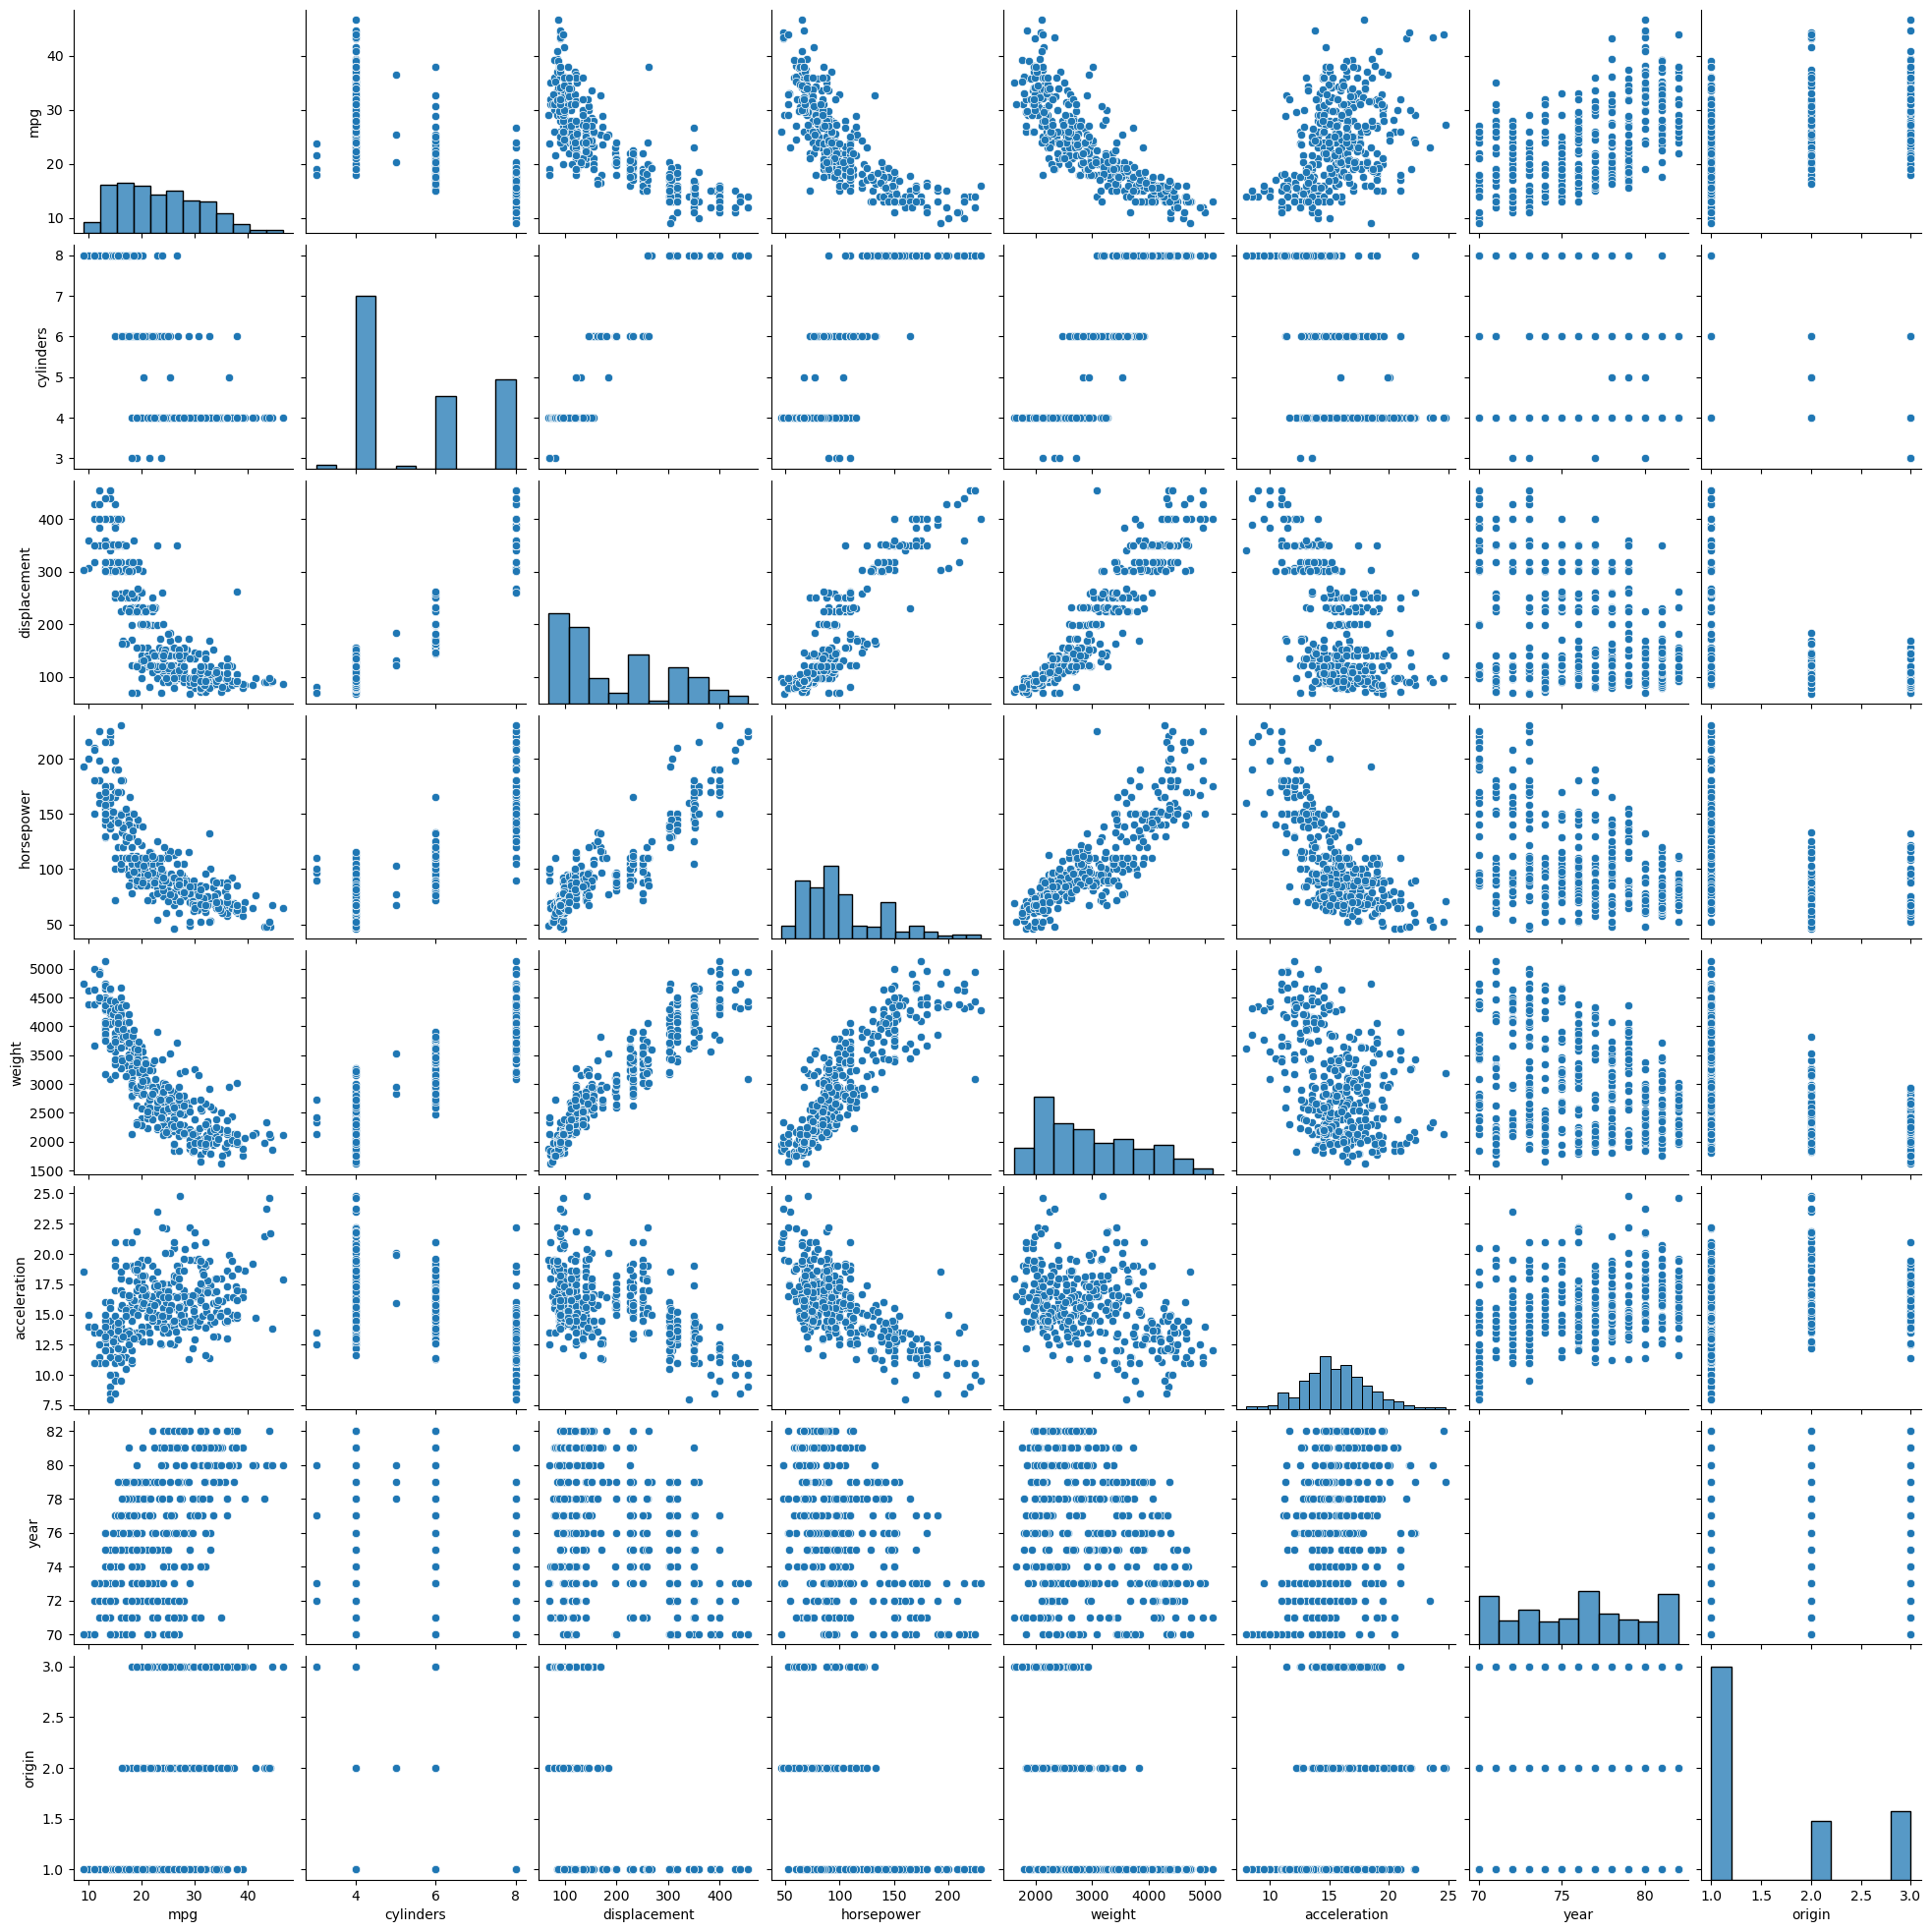

In [368]:
#pairs plot
temp1=sns.pairplot(auto)
plt.show()

#### **Part B**


In [369]:
#correlation matrix
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


#### **Part C**


In [371]:
#creating a linear regression model and summary with constant
y = auto.mpg.tolist()
x = auto[['cylinders','weight','displacement','acceleration','year','origin','horsepower']]
x = sm.add_constant(x)
model1= sm.OLS(y,x).fit()
temp1=model1.summary()
print(temp1)
    

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          2.04e-139
Time:                        20:06:21   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

**I**:  There is a negative correlation between mpg and the predictors weight, horsepower, displacement. There also seems to be a positive correlation between mpg with the predictors acceleration, year, origin and acceleration. 

**II**: Displacement, weight, year and origin seem to be statistically significant since their pvalues are all $ < {0.05}$.

**III**: For each additional mpg we expect the mean number of years to increase by 0.75. 


#### **Part D**

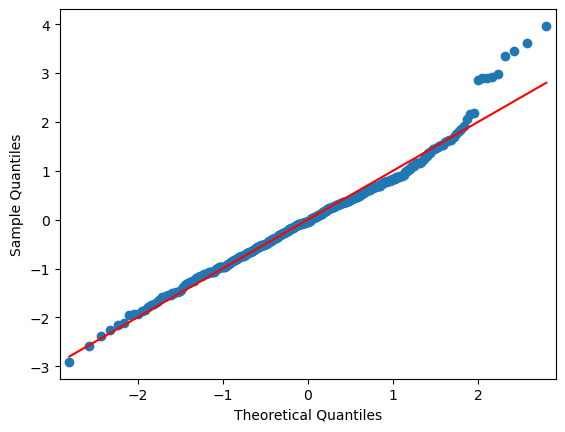

In [239]:
#plotting qq 
res = model1.resid 
fig = sm.qqplot(res,line="s",fit=True)
plt.show()
 

Most of the plot follows our true model and little curvature is shown. The plot though has a right skew. A couple of outliers occur at the end of the tail. 

In [240]:
#finding residuals to plot a residual vs fitted plot
Rstudent=model1.outlier_test()
print(Rstudent)

     student_resid   unadj_p  bonf(p)
0         0.911694  0.362503      1.0
1         0.303123  0.761961      1.0
2         0.838033  0.402535      1.0
3         0.284757  0.775984      1.0
4         0.618443  0.536651      1.0
..             ...       ...      ...
392      -0.400051  0.689342      1.0
393       2.968385  0.003182      1.0
394       0.263679  0.792169      1.0
395      -0.409047  0.682733      1.0
396       0.689682  0.490812      1.0

[392 rows x 3 columns]


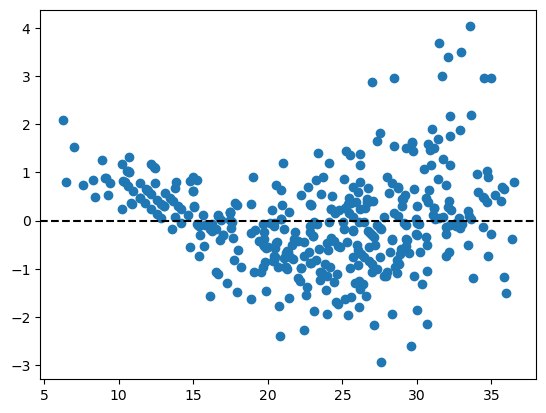

In [176]:
#plotting residual vs fitted 
y1 = Rstudent['student_resid']
x1 = model1.fittedvalues
plt.scatter(x1, y1)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

The data in the residual plot departs from linearity, and the error variance also seems to increase at a certain point around 20. Transformations should be considered. 

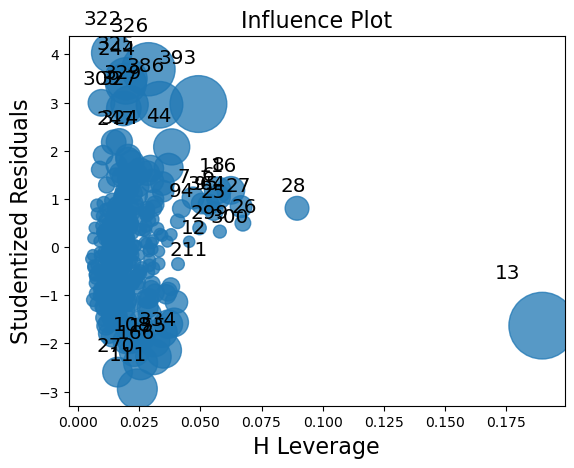

In [194]:
#Influence plot 
fig = sm.graphics.influence_plot(model1,alpha=0.05 ,criterion="cooks")
plt.show()

Point 13 has high leverage and quite a high residual value. Seems like it has a high influence meaning changing or deleting it could change our model quite a bit. We also have quite a bit of point that have high residuals indicating that the model could have potential outliers as well. 

#### **Part E**

In [243]:
#creating new regression model 
model_interaction=smf.ols(formula="mpg ~ cylinders+weight+displacement + acceleration + year +origin +horsepower+cylinders:horsepower +weight:displacement+displacement:acceleration+acceleration:year+year:origin", data=auto).fit()
model_interaction.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     224.4
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          7.25e-164
Time:                        01:30:15   Log-Likelihood:                -951.09
No. Observations:                 392   AIC:                             1928.
Df Residuals:                     379   BIC:                             1980.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   112.6398     21.690      5.193      0.000      69.992     155.287
cylinders                    -1.3638      0.788     -1.730      0.084      -2.914       0.186
weight                       -0.0078      0.001     -7.063      0.000      -0.010      -0.006
displacement                 -0.0609      0.017     -3.638      0.000      -0.094      -0.028
acceleration                 -6.1145      1.291     -4.737      0.000      -8.653      -3.576
year                         -0.6657      0.265     -2.512      0.012      -1.187      -0.145
origin                       -7.9491      4.145     -1.918      0.056     -16.100       0.202
horsepower                   -0.1515      0.047     -3.239      0.001      -0.243      -0.060
cylinders:horsepower          0.0158      0.007      2.377      0.018       0.003       0.029
weight:displacement         1.54e-05   3.44e-06      4.479      0.000    8.64e-06    2.22e-05
displacement:acceleration  8.213e-05      0.001      0.099      0.921      -0.002       0.002
acceleration:year             0.0792      0.016      4.903      0.000       0.047       0.111
year:origin                   0.1087      0.053      2.044      0.042       0.004       0.213
==============================================================================
Omnibus:                       46.940   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.388
Skew:                           0.601   Prob(JB):                     1.45e-25
Kurtosis:                       5.358   Cond. No.                     1.30e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The interactions between horsepower and cylinders, weight and discplacement, and acceleration and year seem to be significant interactions since the pvalue is $<0$.

#### **Part F**

In [268]:
#log transformation
auto_log=np.log(auto[['cylinders','weight','displacement','acceleration','year','origin','horsepower']])
y2 = auto.mpg.tolist()
x2 = auto_log
x = sm.add_constant(x)
model1= sm.OLS(y2,x2).fit()
temp1=model1.summary()
print(temp1)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              3453.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                        0.00
Time:                        01:57:03   Log-Likelihood:                         -998.94
No. Observations:                 392   AIC:                                      2012.
Df Residuals:                     385   BIC:                                      2040.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Cylinders and displacement become insignificant

In [269]:
#sqrt transformation
auto_log=np.sqrt(auto[['cylinders','weight','displacement','acceleration','year','origin','horsepower']])
y3 = auto.mpg.tolist()
x3 = auto_log
x = sm.add_constant(x)
model1= sm.OLS(y3,x3).fit()
temp1=model1.summary()
print(temp1)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3034.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                        0.00
Time:                        01:57:13   Log-Likelihood:                         -1023.9
No. Observations:                 392   AIC:                                      2062.
Df Residuals:                     385   BIC:                                      2090.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Displacement is not significant 

### **Problem 2**

#### **Part A**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math as m

#Loading the data
AirQ=pd.read_csv('/Users/admin/Documents/Csvv/AirQuality.csv')
AirQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [2]:
#dimensions of dataset
AirQ.shape

(43824, 13)

In [3]:
#first 5 rows of data
AirQ.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
#ridding our data from NaN values
AirQ=AirQ.dropna()
AirQ.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [5]:
#finding the zero in our dataframe 
AirQ.loc[AirQ['pm2.5']==0]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24034,24035,2012,9,28,10,0.0,-5,20.0,1020.0,NW,139.48,0,0
24039,24040,2012,9,28,15,0.0,-10,24.0,1017.0,NW,192.68,0,0


In [6]:
#Double Checking 
pd.Series(AirQ['pm2.5'])[24034]

0.0

In [7]:
#Dropping the values 
AirQ.drop([24034, 24039], inplace = True)

In [8]:
#Checking to see if its gone
np.where(AirQ["pm2.5"]==0)

(array([], dtype=int64),)

In [9]:
#log Transformation 
AirQLog=AirQ
AirQLog["pm2.5"]=np.log(AirQ["pm2.5"])
AirQLog.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,4.859812,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,4.997212,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,5.068904,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,5.198497,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,4.927254,-7,-5.0,1022.0,SE,6.25,2,0


(array([5.0000e+00, 7.3000e+01, 7.1900e+02, 4.1540e+03, 6.1330e+03,
        7.6000e+03, 1.1254e+04, 8.7280e+03, 2.9620e+03, 1.2700e+02]),
 array([0.        , 0.69017372, 1.38034744, 2.07052116, 2.76069488,
        3.4508686 , 4.14104232, 4.83121604, 5.52138977, 6.21156349,
        6.90173721]),
 <BarContainer object of 10 artists>)

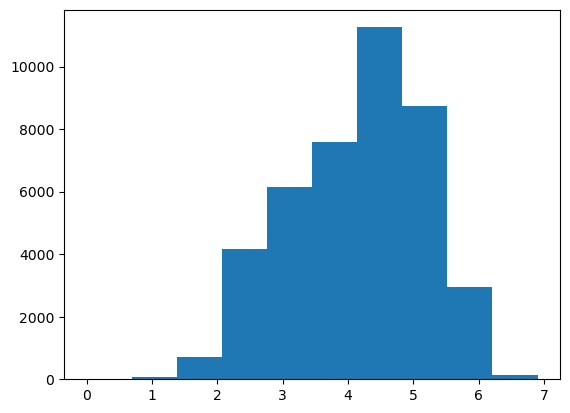

In [10]:
#Histogram
plt.hist(AirQLog['pm2.5'])

#### **Part B**

In [11]:
#observing our data
AirQLog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41755 entries, 24 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      41755 non-null  int64  
 1   year    41755 non-null  int64  
 2   month   41755 non-null  int64  
 3   day     41755 non-null  int64  
 4   hour    41755 non-null  int64  
 5   pm2.5   41755 non-null  float64
 6   DEWP    41755 non-null  int64  
 7   TEMP    41755 non-null  float64
 8   PRES    41755 non-null  float64
 9   cbwd    41755 non-null  object 
 10  Iws     41755 non-null  float64
 11  Is      41755 non-null  int64  
 12  Ir      41755 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.5+ MB


In [12]:
#subsetting by creating new dataframe 
AirQTime= pd.DataFrame(pd.concat([AirQLog["pm2.5"], AirQLog.year, AirQLog.month, AirQLog.day, AirQLog.hour, AirQLog.DEWP,AirQLog.TEMP,AirQLog.PRES,AirQLog.cbwd,AirQLog.Iws,AirQ.Ir,AirQLog.Is], axis=1))
AirQTime["year"]=pd.to_datetime(AirQTime[["year", "month", "day","hour"]])
AirQTime.head()

,pm2.5,year,month,day,hour,DEWP,TEMP,PRES,cbwd,Iws,Ir,Is
24,4.859812,2010-01-02 00:00:00,1,2,0,-16,-4.0,1020.0,SE,1.79,0,0
25,4.997212,2010-01-02 01:00:00,1,2,1,-15,-4.0,1020.0,SE,2.68,0,0
26,5.068904,2010-01-02 02:00:00,1,2,2,-11,-5.0,1021.0,SE,3.57,0,0
27,5.198497,2010-01-02 03:00:00,1,2,3,-7,-5.0,1022.0,SE,5.36,0,1
28,4.927254,2010-01-02 04:00:00,1,2,4,-7,-5.0,1022.0,SE,6.25,0,2


In [13]:
#Creating time series data from existing data
temp1=AirQTime["year"]
temp2=AirQTime["pm2.5"]
Aiq=pd.DataFrame(temp1)
Aiq["pm"]=(temp2)
Aiq.head()

,year,pm
24,2010-01-02 00:00:00,4.859812
25,2010-01-02 01:00:00,4.997212
26,2010-01-02 02:00:00,5.068904
27,2010-01-02 03:00:00,5.198497
28,2010-01-02 04:00:00,4.927254


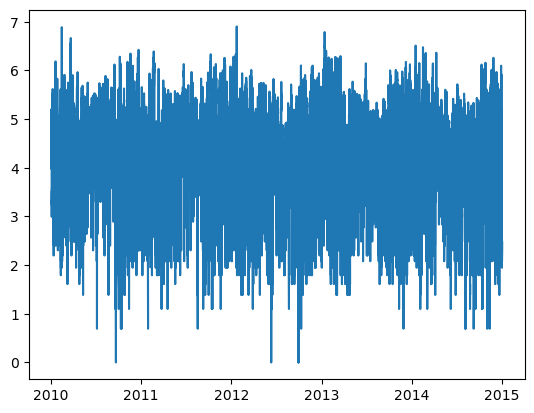

In [15]:
#plotting time series plot
xx = Aiq[["year"]]
yy = Aiq["pm"]
plt.plot(xx,yy)
plt.show()

Our graph shows a steady rate throughout the years. There seems to be a bit of seasonailty I believe its hard to tell but during the end of the year the pm2.5 goes down and there are peaks in the begining of the years. Therefore, the begining months like january has higher levels of pm2.5. No specifc hours or days. AS shown below. 

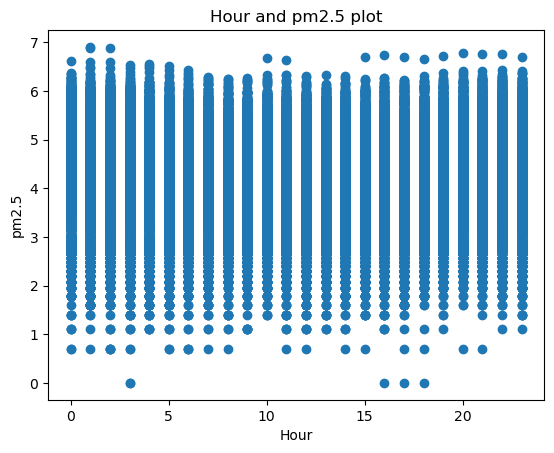

In [19]:
xx4= AirQLog['hour']
yy4 = AirQLog["pm2.5"]
plt.plot(xx4,yy4,"o")
plt.xlabel('Hour') 
plt.ylabel('pm2.5') 
plt.title("Hour and pm2.5 plot")
plt.show()

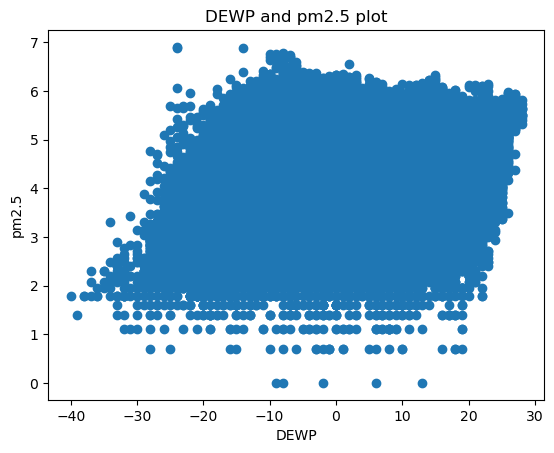

In [20]:
xx4= AirQLog["DEWP"]
yy4 = AirQLog["pm2.5"]
plt.plot(xx4,yy4,"o")
plt.xlabel('DEWP') 
plt.ylabel('pm2.5') 
plt.title("DEWP and pm2.5 plot")
plt.show()

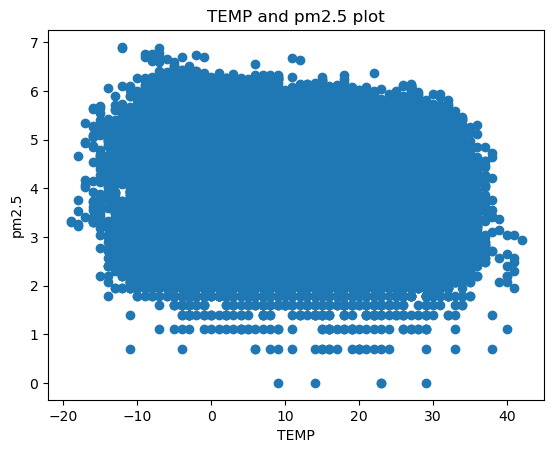

In [21]:
xx5 = AirQLog["TEMP"]
yy5 = AirQLog["pm2.5"]
plt.plot(xx5,yy5,"o")
plt.xlabel('TEMP') 
plt.ylabel('pm2.5') 
plt.title("TEMP and pm2.5 plot")
plt.show()

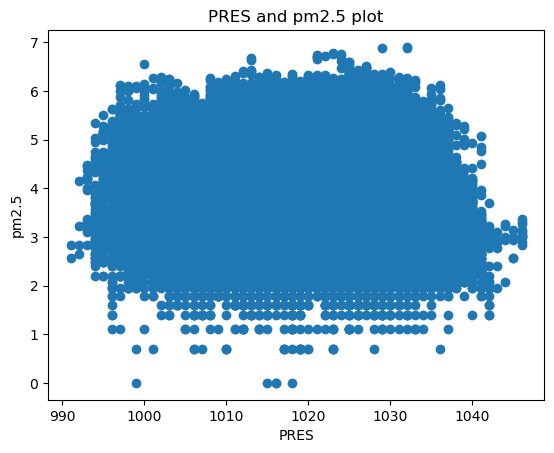

In [22]:
xx6 = AirQLog["PRES"]
yy6 = AirQLog["pm2.5"]
plt.plot(xx6,yy6,"o")
plt.xlabel('PRES') 
plt.ylabel('pm2.5') 
plt.title("PRES and pm2.5 plot")
plt.show()

No correlation with pollution from factors listed above. 

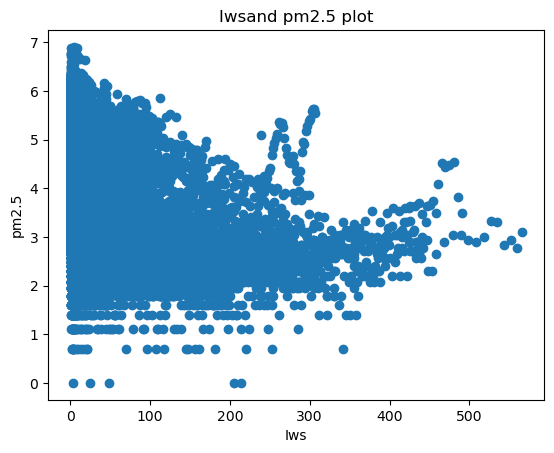

In [23]:
xx7 = AirQLog["Iws"]
yy7 = AirQLog["pm2.5"]
plt.plot(xx7,yy7,"o")
plt.xlabel('Iws') 
plt.ylabel('pm2.5') 
plt.title("Iws and pm2.5 plot")
plt.show()

As cumulated wind speed increases it seems that the average pollution(pm2.5) goes down. 

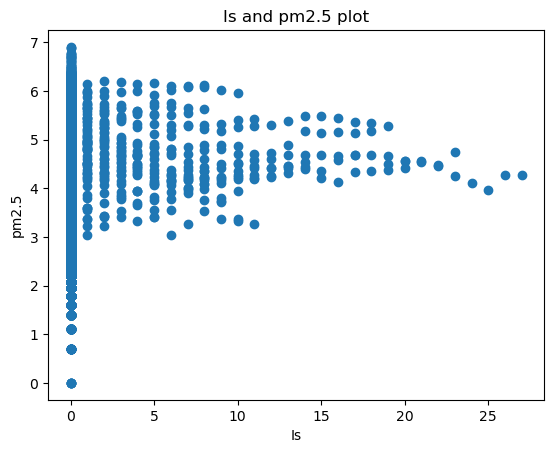

In [24]:
xx8 = AirQLog["Is"]
yy8 = AirQLog["pm2.5"]
plt.plot(xx8,yy8,"o")
plt.xlabel('Is') 
plt.ylabel('pm2.5') 
plt.title("Is and pm2.5 plot")
plt.show()

Low cumulated hours of snow has more pollution.

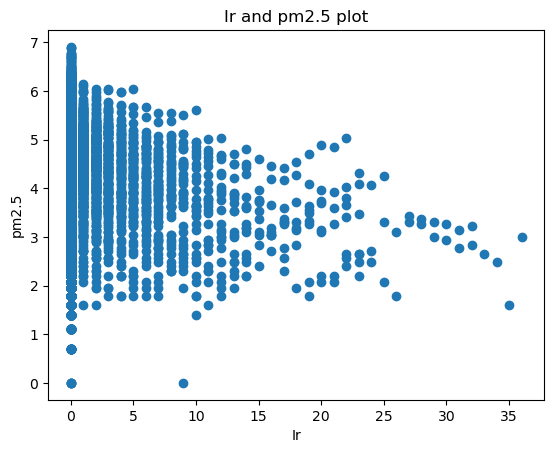

In [25]:
x9 = AirQLog["Ir"]
y9 = AirQLog["pm2.5"]
plt.plot(x9,y9,"o")
plt.xlabel('Ir') 
plt.ylabel('pm2.5') 
plt.title("Ir and pm2.5 plot")
plt.show()

Low cumulated hours of rain has more pollution.

#### **Part C**


In [333]:
#Creating new dataFrame
New=pd.DataFrame(pd.concat([AirQLog["pm2.5"], AirQLog.DEWP,AirQLog.TEMP,AirQLog.PRES,AirQLog.cbwd,AirQLog.Iws,AirQ.Ir,AirQLog.Is], axis=1))
print(New)

          pm2.5  DEWP  TEMP    PRES cbwd     Iws  Ir  Is
24     4.859812   -16  -4.0  1020.0   SE    1.79   0   0
25     4.997212   -15  -4.0  1020.0   SE    2.68   0   0
26     5.068904   -11  -5.0  1021.0   SE    3.57   0   0
27     5.198497    -7  -5.0  1022.0   SE    5.36   0   1
28     4.927254    -7  -5.0  1022.0   SE    6.25   0   2
...         ...   ...   ...     ...  ...     ...  ..  ..
43819  2.079442   -23  -2.0  1034.0   NW  231.97   0   0
43820  2.302585   -22  -3.0  1034.0   NW  237.78   0   0
43821  2.302585   -22  -3.0  1034.0   NW  242.70   0   0
43822  2.079442   -22  -4.0  1034.0   NW  246.72   0   0
43823  2.484907   -21  -3.0  1034.0   NW  249.85   0   0

[41755 rows x 8 columns]


Perform a transformation on month, day, and hour that is appropriate for linear regression with cyclic variables: $x_{7}→(cos(2πx/τ),sin(2πx/τ))$

where τ = 12, 30, or 24 respectively. Remove the original coding of the cyclic variables from your
dataset. Then split the data into a training and validation set.

In [334]:
#function for transformation t=12
def my_function(x1):
    x=2*x1* m.pi
    x2=x/12
    Cos = np.cos(x2)
    Sin = np.sin(x2)
    df = pd.concat([Cos, Sin], axis=1)
    return(df)

In [335]:
month12=my_function(AirQLog.month)
day12=my_function(AirQLog.day)
hour12=my_function(AirQLog.hour)

In [336]:
#function for transformation t=30
def my_function30(x1):
    x=2*x1* m.pi
    x2=x/30
    Cos = np.cos(x2)
    Sin = np.sin(x2)
    df = pd.concat([Cos, Sin], axis=1)
    return(df)

In [337]:
month30=my_function30(AirQLog.month)
day30=my_function30(AirQLog.day)
hour30=my_function30(AirQLog.hour)

In [338]:
#function for transformation t=24
def my_function24(x1):
    x=2*x1* m.pi
    x2=x/24
    Cos = np.cos(x2)
    Sin = np.sin(x2)
    df = pd.concat([Cos, Sin], axis=1)
    return(df)

In [339]:
month24=my_function24(AirQLog.month)
day24=my_function24(AirQLog.day)
hour24=my_function24(AirQLog.hour)

In [340]:
New1=pd.concat([New,month12,day12,hour12,month30,day30,hour30,month24,day24,hour24], axis=1)
print(New1)

          pm2.5  DEWP  TEMP    PRES cbwd     Iws  Ir  Is     month  \
24     4.859812   -16  -4.0  1020.0   SE    1.79   0   0  0.866025   
25     4.997212   -15  -4.0  1020.0   SE    2.68   0   0  0.866025   
26     5.068904   -11  -5.0  1021.0   SE    3.57   0   0  0.866025   
27     5.198497    -7  -5.0  1022.0   SE    5.36   0   1  0.866025   
28     4.927254    -7  -5.0  1022.0   SE    6.25   0   2  0.866025   
...         ...   ...   ...     ...  ...     ...  ..  ..       ...   
43819  2.079442   -23  -2.0  1034.0   NW  231.97   0   0  1.000000   
43820  2.302585   -22  -3.0  1034.0   NW  237.78   0   0  1.000000   
43821  2.302585   -22  -3.0  1034.0   NW  242.70   0   0  1.000000   
43822  2.079442   -22  -4.0  1034.0   NW  246.72   0   0  1.000000   
43823  2.484907   -21  -3.0  1034.0   NW  249.85   0   0  1.000000   

              month  ...       day       day      hour      hour     month  \
24     5.000000e-01  ...  0.913545  0.406737  1.000000  0.000000  0.965926   
25 

In [511]:
#loading in another library 
import sklearn.linear_model as skl 
from sklearn.model_selection import train_test_split

In [512]:
df_train, df_val = train_test_split(New1, test_size=int(0.25*New1.shape[0]))

In [513]:
#training data
df_train

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Ir,Is,month,month,...,day,day,hour,hour,month,month,day,day,hour,hour
26398,5.323010,-18,-13.0,1029.0,cv,2.68,0,0,8.660254e-01,0.500000,...,0.669131,7.431448e-01,-0.104528,-0.994522,0.965926,0.258819,5.000000e-01,0.866025,0.866025,-0.500000
32258,4.219508,14,18.0,1016.0,cv,1.78,0,0,-1.836970e-16,-1.000000,...,0.309017,9.510565e-01,0.913545,0.406737,-0.707107,0.707107,6.123234e-17,1.000000,0.866025,0.500000
28975,5.017280,5,9.0,1016.0,SE,6.71,0,0,-5.000000e-01,0.866025,...,-0.104528,-9.945219e-01,0.104528,0.994522,0.500000,0.866025,8.660254e-01,-0.500000,-0.258819,0.965926
26642,4.060443,-8,-5.0,1028.0,SE,42.91,0,0,8.660254e-01,0.500000,...,-1.000000,5.665539e-16,0.913545,0.406737,0.965926,0.258819,-7.071068e-01,-0.707107,0.866025,0.500000
39585,4.875197,22,28.0,1002.0,NE,5.37,0,0,-8.660254e-01,-0.500000,...,-0.104528,9.945219e-01,-0.309017,0.951057,-0.258819,0.965926,-5.000000e-01,0.866025,-0.707107,0.707107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26339,2.772589,-28,-9.0,1041.0,NW,223.09,0,0,8.660254e-01,0.500000,...,0.913545,4.067366e-01,-0.669131,0.743145,0.965926,0.258819,8.660254e-01,0.500000,-0.965926,0.258819
21925,2.564949,11,34.0,997.0,cv,3.13,0,0,-8.660254e-01,-0.500000,...,0.913545,4.067366e-01,-0.913545,0.406737,-0.258819,0.965926,8.660254e-01,0.500000,-0.965926,-0.258819
18418,3.091042,-25,-7.0,1033.0,NW,14.30,0,0,5.000000e-01,0.866025,...,0.104528,9.945219e-01,-0.500000,0.866025,0.866025,0.500000,-2.588190e-01,0.965926,-0.866025,0.500000
19741,3.871201,-5,11.0,1015.0,SE,7.60,0,0,-5.000000e-01,0.866025,...,0.913545,4.067366e-01,-0.913545,0.406737,0.500000,0.866025,8.660254e-01,0.500000,-0.965926,-0.258819


In [514]:
#validation data
df_val

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Ir,Is,month,month,...,day,day,hour,hour,month,month,day,day,hour,hour
10496,2.484907,-15,5.0,1031.0,NW,38.89,0,0,6.123234e-17,1.000000e+00,...,-0.978148,2.079117e-01,-0.104528,9.945219e-01,7.071068e-01,0.707107,-8.660254e-01,-5.000000e-01,-5.000000e-01,0.866025
14802,2.639057,9,20.0,1021.0,cv,0.89,0,0,-1.836970e-16,-1.000000e+00,...,-0.309017,9.510565e-01,-0.809017,-5.877853e-01,-7.071068e-01,0.707107,-7.071068e-01,7.071068e-01,-1.836970e-16,-1.000000
33422,3.091042,-7,17.0,1025.0,NW,29.50,0,0,5.000000e-01,-8.660254e-01,...,0.309017,-9.510565e-01,-0.978148,2.079117e-01,-8.660254e-01,0.500000,1.000000e+00,-2.449294e-16,-8.660254e-01,-0.500000
3911,4.644391,17,23.0,1007.0,NW,14.75,2,0,-1.000000e+00,1.224647e-16,...,-0.809017,5.877853e-01,0.104528,-9.945219e-01,6.123234e-17,1.000000,-1.000000e+00,1.224647e-16,9.659258e-01,-0.258819
9375,4.262680,-18,0.0,1037.0,SE,4.92,0,0,8.660254e-01,5.000000e-01,...,0.669131,-7.431448e-01,-1.000000,5.665539e-16,9.659258e-01,0.258819,8.660254e-01,5.000000e-01,-7.071068e-01,-0.707107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38385,4.369448,17,21.0,1006.0,cv,0.89,0,0,-8.660254e-01,5.000000e-01,...,-0.669131,-7.431448e-01,-0.309017,9.510565e-01,2.588190e-01,0.965926,2.588190e-01,-9.659258e-01,-7.071068e-01,0.707107
23215,4.962845,17,19.0,1013.0,cv,0.89,0,0,-5.000000e-01,-8.660254e-01,...,0.500000,-8.660254e-01,0.104528,9.945219e-01,-5.000000e-01,0.866025,9.659258e-01,2.588190e-01,-2.588190e-01,0.965926
427,6.011267,-7,-3.0,1025.0,SE,0.89,0,0,8.660254e-01,5.000000e-01,...,-0.809017,-5.877853e-01,-0.669131,-7.431448e-01,9.659258e-01,0.258819,-1.836970e-16,-1.000000e+00,2.588190e-01,-0.965926
33199,2.564949,-3,2.0,1033.0,NW,1.79,0,0,5.000000e-01,-8.660254e-01,...,-1.000000,5.665539e-16,0.104528,9.945219e-01,-8.660254e-01,0.500000,-7.071068e-01,-7.071068e-01,-2.588190e-01,0.965926


#### **Part D**


In [26]:
#observing data
AirQLog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41755 entries, 24 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      41755 non-null  int64  
 1   year    41755 non-null  int64  
 2   month   41755 non-null  int64  
 3   day     41755 non-null  int64  
 4   hour    41755 non-null  int64  
 5   pm2.5   41755 non-null  float64
 6   DEWP    41755 non-null  int64  
 7   TEMP    41755 non-null  float64
 8   PRES    41755 non-null  float64
 9   cbwd    41755 non-null  object 
 10  Iws     41755 non-null  float64
 11  Is      41755 non-null  int64  
 12  Ir      41755 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.5+ MB


In [27]:
AirQLog["cbwd"]

24       SE
25       SE
26       SE
27       SE
28       SE
         ..
43819    NW
43820    NW
43821    NW
43822    NW
43823    NW
Name: cbwd, Length: 41755, dtype: object

In [28]:
#replacing objects with int
AirQLog["cbwd"] = AirQLog["cbwd"].replace(
    to_replace=['NE', 'NW','SE','cv'], 
    value=[0,1,2,3])
print(AirQLog["cbwd"])

24       2
25       2
26       2
27       2
28       2
        ..
43819    1
43820    1
43821    1
43822    1
43823    1
Name: cbwd, Length: 41755, dtype: int64


In [29]:
#checking data again
AirQLog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41755 entries, 24 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      41755 non-null  int64  
 1   year    41755 non-null  int64  
 2   month   41755 non-null  int64  
 3   day     41755 non-null  int64  
 4   hour    41755 non-null  int64  
 5   pm2.5   41755 non-null  float64
 6   DEWP    41755 non-null  int64  
 7   TEMP    41755 non-null  float64
 8   PRES    41755 non-null  float64
 9   cbwd    41755 non-null  int64  
 10  Iws     41755 non-null  float64
 11  Is      41755 non-null  int64  
 12  Ir      41755 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 4.5 MB


In [30]:
#creating regression model
x= AirQLog[["No","year","month","day","hour","DEWP","TEMP","PRES","cbwd","Iws","Ir","Is"]]
y= AirQLog["pm2.5"]
modelF= sm.OLS(y,x).fit()
temp=modelF.summary()
print(temp)


                                 OLS Regression Results                                
Dep. Variable:                  pm2.5   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                          9.566e+04
Date:                Wed, 26 Oct 2022   Prob (F-statistic):                        0.00
Time:                        04:17:43   Log-Likelihood:                         -49854.
No. Observations:               41755   AIC:                                  9.973e+04
Df Residuals:                   41743   BIC:                                  9.983e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

For each additional pm2.5 we expect the mean number to decrease by $\approx 0$
All variables are significant when the $\alpha= 0.05$. 
There is indication that there could be strong multicollinearity. 


#### **Part E**

In [394]:
#Variables to use
#["No","year","month","day","hour","DEWP","TEMP","PRES","cbwd","Iws","Ir","Is"]
#y = AirQLog["pm2.5"]

In [478]:
def functionQ(x1):
    y=AirQLog["pm2.5"]
    x=AirQLog[x1]
    modelF= sm.OLS(y,x).fit()
    print(modelF.summary())
    
#makeshift forward selection

In [479]:
functionQ(["No"])

                                 OLS Regression Results                                
Dep. Variable:                  pm2.5   R-squared (uncentered):                   0.704
Model:                            OLS   Adj. R-squared (uncentered):              0.704
Method:                 Least Squares   F-statistic:                          9.942e+04
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                        0.00
Time:                        21:28:04   Log-Likelihood:                         -94358.
No. Observations:               41755   AIC:                                  1.887e+05
Df Residuals:                   41754   BIC:                                  1.887e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [480]:
functionQ(["No","year"])

                                 OLS Regression Results                                
Dep. Variable:                  pm2.5   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          3.347e+05
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                        0.00
Time:                        21:28:04   Log-Likelihood:                         -60600.
No. Observations:               41755   AIC:                                  1.212e+05
Df Residuals:                   41753   BIC:                                  1.212e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The $R^{2}$ value increases and the conidtion value is steadly increasing. The SE remains low. 

In [481]:
functionQ(["No","year","month"])

                                 OLS Regression Results                                
Dep. Variable:                  pm2.5   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          2.233e+05
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                        0.00
Time:                        21:28:05   Log-Likelihood:                         -60584.
No. Observations:               41755   AIC:                                  1.212e+05
Df Residuals:                   41752   BIC:                                  1.212e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The conditional value is exremely high, indicating collinearity. So we will remove it. Knowing that time correlates with each other the other time variables will show high collinearity as well. 

In [482]:
functionQ(["No","year","DEWP"])

                                 OLS Regression Results                                
Dep. Variable:                  pm2.5   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                          2.496e+05
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                        0.00
Time:                        21:28:05   Log-Likelihood:                         -58394.
No. Observations:               41755   AIC:                                  1.168e+05
Df Residuals:                   41752   BIC:                                  1.168e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [483]:
functionQ(["No","year","TEMP"])

                                 OLS Regression Results                                
Dep. Variable:                  pm2.5   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          2.233e+05
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                        0.00
Time:                        21:28:06   Log-Likelihood:                         -60590.
No. Observations:               41755   AIC:                                  1.212e+05
Df Residuals:                   41752   BIC:                                  1.212e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [484]:
functionQ(["No","year","Iws"])

                                 OLS Regression Results                                
Dep. Variable:                  pm2.5   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                          2.584e+05
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                        0.00
Time:                        21:28:06   Log-Likelihood:                         -57708.
No. Observations:               41755   AIC:                                  1.154e+05
Df Residuals:                   41752   BIC:                                  1.154e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [485]:
functionQ(["No","PRES","Iws"])

                                 OLS Regression Results                                
Dep. Variable:                  pm2.5   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                          2.552e+05
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                        0.00
Time:                        21:28:06   Log-Likelihood:                         -57952.
No. Observations:               41755   AIC:                                  1.159e+05
Df Residuals:                   41752   BIC:                                  1.159e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

This is the last variable I tested trying to perform a forward regression.  Next is more variables i have tested. 

Iws increase the $R^{2}$ value and didnt show any signs of high collinearity with the other variables in the model.

In [486]:
functionQ(["No","year","cbwd","Iws"])

                                 OLS Regression Results                                
Dep. Variable:                  pm2.5   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                          2.076e+05
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                        0.00
Time:                        21:28:08   Log-Likelihood:                         -56337.
No. Observations:               41755   AIC:                                  1.127e+05
Df Residuals:                   41751   BIC:                                  1.127e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Some good predictors for the model includes no,years,cbwd and Iws. The $R^{2} is \approx 0.95$
It is lower than the full model but it has a less conditional value than the full model. 

#### **Part F**

In [542]:
#df_val
#linear regression full model on validation set
reg = skl.LinearRegression() 
x=["month","day","hour","DEWP","TEMP","PRES","Iws","Is","Ir"]
x=df_val[x]
y=df_val["pm2.5"]
reg.fit(x, y)
y_pre=reg.predict(x)
df_val["y_pre"]=y_pre
print(df_val.head())


          pm2.5  DEWP  TEMP    PRES cbwd    Iws  Ir  Is         month  \
10496  2.484907   -15   5.0  1031.0   NW  38.89   0   0  6.123234e-17   
14802  2.639057     9  20.0  1021.0   cv   0.89   0   0 -1.836970e-16   
33422  3.091042    -7  17.0  1025.0   NW  29.50   0   0  5.000000e-01   
3911   4.644391    17  23.0  1007.0   NW  14.75   2   0 -1.000000e+00   
9375   4.262680   -18   0.0  1037.0   SE   4.92   0   0  8.660254e-01   

              month  ...       day      hour          hour         month  \
10496  1.000000e+00  ...  0.207912 -0.104528  9.945219e-01  7.071068e-01   
14802 -1.000000e+00  ...  0.951057 -0.809017 -5.877853e-01 -7.071068e-01   
33422 -8.660254e-01  ... -0.951057 -0.978148  2.079117e-01 -8.660254e-01   
3911   1.224647e-16  ...  0.587785  0.104528 -9.945219e-01  6.123234e-17   
9375   5.000000e-01  ... -0.743145 -1.000000  5.665539e-16  9.659258e-01   

          month       day           day          hour      hour     y_pre  
10496  0.707107 -0.866025 -5

In [543]:
#function to calc MSE
def mse(actual, predicted):
    actual=np.array(actual)
    predicted=np.array(predicted)
    differences=np.subtract(actual,predicted)
    squared_differences=np.square(differences)
    return squared_differences.mean()

mse(df_val["pm2.5"],df_val["y_pre"])

0.5142133030029876

In [545]:
#linear regression reduced model on validation set
reg = skl.LinearRegression() 
x=["No","year","cbwd","Iws"]
x=AirQLog[x]
y=AirQLog["pm2.5"]
reg.fit(x, y)
y_pre=reg.predict(x)
AirQLog["y_pre"]=y_pre
print(df_val.head())


          pm2.5  DEWP  TEMP    PRES cbwd    Iws  Ir  Is         month  \
10496  2.484907   -15   5.0  1031.0   NW  38.89   0   0  6.123234e-17   
14802  2.639057     9  20.0  1021.0   cv   0.89   0   0 -1.836970e-16   
33422  3.091042    -7  17.0  1025.0   NW  29.50   0   0  5.000000e-01   
3911   4.644391    17  23.0  1007.0   NW  14.75   2   0 -1.000000e+00   
9375   4.262680   -18   0.0  1037.0   SE   4.92   0   0  8.660254e-01   

              month  ...       day      hour          hour         month  \
10496  1.000000e+00  ...  0.207912 -0.104528  9.945219e-01  7.071068e-01   
14802 -1.000000e+00  ...  0.951057 -0.809017 -5.877853e-01 -7.071068e-01   
33422 -8.660254e-01  ... -0.951057 -0.978148  2.079117e-01 -8.660254e-01   
3911   1.224647e-16  ...  0.587785  0.104528 -9.945219e-01  6.123234e-17   
9375   5.000000e-01  ... -0.743145 -1.000000  5.665539e-16  9.659258e-01   

          month       day           day          hour      hour     y_pre  
10496  0.707107 -0.866025 -5

In [546]:
#mse for reduced model
mse(df_val["pm2.5"],df_val["y_pre"])

0.5142133030029876

My MSEs are the same. 